# Predicting a Pulsar Star

In [5]:
#load the necessary modules
import pandas as pd
import numpy as np
# from scipy.io import loadmat
# import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import datetime
import os
import warnings
warnings.filterwarnings("ignore")

In [6]:
path = '../ten-datasets/'

#load the dataset into a dataframe
df = pd.read_csv(path + 'pulsar_stars.csv')

In [7]:
print(df.shape)
df.head()

(17898, 9)


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [9]:
df.target_class.unique()

array([0, 1])

In [10]:
print(df.target_class.shape)

(17898,)


In [11]:
y = df.iloc[:,-1]
X = df.iloc[:,0:-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state = 0, stratify=y)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14318, 8)
(14318,)
(3580, 8)
(3580,)


In [13]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.transform(X_test)

# Shallow
> ### LogisticRegression

> ### DecisionTreeRegressor

## LogisticRegression

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
lr = LogisticRegression(C=100,max_iter = 100, tol=.1,solver='sag')

In [16]:
%%time
lr.fit(X_train, y_train)

CPU times: user 18.7 ms, sys: 2.2 ms, total: 20.9 ms
Wall time: 19.2 ms


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.1, verbose=0,
                   warm_start=False)

In [17]:
y_train_predict = lr.predict(X_train)
print ("Logistic Train Accuracy: %.3f" % accuracy_score(y_train,y_train_predict))


Logistic Train Accuracy: 0.977


In [18]:
y_test_predict = lr.predict_proba(X_test).argmax(axis = 1)
print("Logistic Test Accuracy: %.3f" % accuracy_score(y_test,y_test_predict))


Logistic Test Accuracy: 0.979


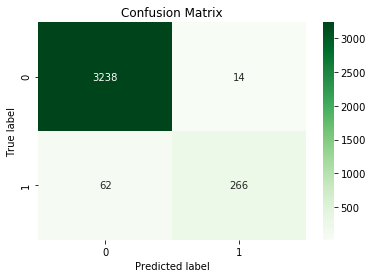

In [19]:
matrix = confusion_matrix(y_test, y_test_predict)
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(matrix, annot=True, cmap='Greens', fmt='d', ax=ax)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
labels = np.unique(y_test)
plt.xticks(np.arange(len(labels))+0.5,labels)
plt.ylabel('True label')
plt.yticks(np.arange(len(labels))+0.5,labels)
plt.show()

### Optimising Regularisation ('C')

In [20]:
from sklearn.model_selection import validation_curve

#define the values of C to test and then use validation_curve from sklearn to evaluate
parameter_range = [0.00001,0.0001,0.001,0.01,0.1,1,10,100]
train_scores, test_scores = validation_curve(estimator = lr, X=X_train, y=y_train, param_name ='C',param_range=parameter_range,cv=15)

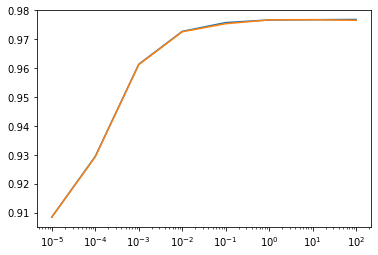

In [21]:
#obtain the mean results from the samples
train_mean = np.mean(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)

#plot the results
plt.plot(parameter_range,train_mean)
plt.plot(parameter_range,test_mean)
plt.xscale('log')

In [22]:
optimal_C = parameter_range[test_mean.argmax()]
print(optimal_C)

10


### The model is the best

## DecisionTreeRegressor

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
%%time

tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)

CPU times: user 114 ms, sys: 2.86 ms, total: 116 ms
Wall time: 114 ms


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [25]:
%%time
y_train_predict = tree.predict(X_train)
print ("tree Train Accuracy: %.3f" % accuracy_score(y_train,y_train_predict))

tree Train Accuracy: 1.000
CPU times: user 4.93 ms, sys: 1.87 ms, total: 6.79 ms
Wall time: 4.59 ms


In [26]:
%%time
y_test_predict = tree.predict(X_test)
print("tree Test Accuracy: %.3f" % accuracy_score(y_test,y_test_predict))

tree Test Accuracy: 0.968
CPU times: user 2.53 ms, sys: 1.73 ms, total: 4.26 ms
Wall time: 2.5 ms


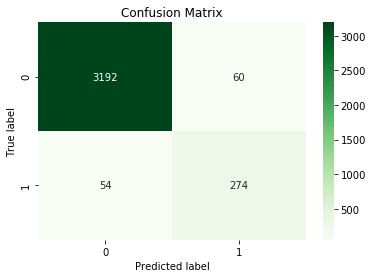

In [27]:
matrix = confusion_matrix(y_test, y_test_predict)
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(matrix, annot=True, cmap='Greens', fmt='d', ax=ax)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
labels = np.unique(y_test)
plt.xticks(np.arange(len(labels))+0.5,labels)
plt.ylabel('True label')
plt.yticks(np.arange(len(labels))+0.5,labels)
plt.show()

# deep learning
> #### MLP 

> #### CNN

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


## MLP



In [64]:
ann_model = Sequential()

ann_model.add(Dense(
        units = 4, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))

ann_model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))

ann_model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))


ann_model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

ann_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann_model.summary()

# image_name = 'plusarStars_ann_model.png'
# plot_model(ann_model,to_file=image_name,show_shapes=True,show_layer_names=False,rankdir='TB')
# plt.figure(figsize=(10,10))
# img = plt.imread(image_name)
# plt.imshow(img)
# plt.axis('off')
# plt.show()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_14 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_15 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 33        
Total params: 2,469
Trainable params: 2,469
Non-trainable params: 0
_________________________________________________________________


In [62]:
ann_model.fit(X_train, y_train, batch_size=64, epochs=5)

hist = ann_model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=5,
                    verbose=1,
                    validation_data=(X_test, y_test))

score = ann_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
14318/14318 [==============================] - 0s 26us/step - loss: 0.0681 - accuracy: 0.9798
Epoch 2/5
14318/14318 [==============================] - 0s 24us/step - loss: 0.0679 - accuracy: 0.9801
Epoch 3/5
14318/14318 [==============================] - 0s 24us/step - loss: 0.0682 - accuracy: 0.9803
Epoch 4/5
14318/14318 [==============================] - 0s 26us/step - loss: 0.0677 - accuracy: 0.9800
Epoch 5/5
14318/14318 [==============================] - 0s 24us/step - loss: 0.0678 - accuracy: 0.9802
Train on 14318 samples, validate on 3580 samples
Epoch 1/5
14318/14318 [==============================] - 0s 27us/step - loss: 0.0678 - accuracy: 0.9798 - val_loss: 0.0671 - val_accuracy: 0.9804
Epoch 2/5
14318/14318 [==============================] - 0s 30us/step - loss: 0.0674 - accuracy: 0.9804 - val_loss: 0.0663 - val_accuracy: 0.9813
Epoch 3/5
14318/14318 [==============================] - 0s 30us/step - loss: 0.0676 - accuracy: 0.9800 - val_loss: 0.0666 - val_accuracy: 

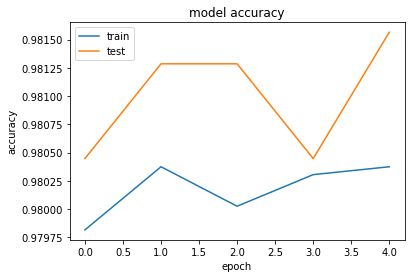

In [63]:
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## CNN

In [52]:
from keras.models import Sequential
from keras.layers import Input, Conv1D, Conv2D, BatchNormalization, Activation, MaxPooling1D, MaxPooling2D, Dropout, Flatten, Dense

In [53]:
X_train_resh = X_train[:, :, np.newaxis]
X_test_resh = X_test[:, :, np.newaxis]
print(X_train_resh.shape)
print(y_train.shape)

print(X_test_resh.shape)
print(y_test.shape)

(14318, 8, 1)
(14318,)
(3580, 8, 1)
(3580,)


In [54]:
X_train_resh[0]

array([[-0.63397712],
       [-0.9819066 ],
       [-0.03306956],
       [-0.07815054],
       [-0.37014816],
       [-0.63049162],
       [ 0.7005112 ],
       [ 0.48032751]])

In [65]:
#bn_axis = 3

cnn_model = Sequential()

cnn_model.add(Conv1D(filters = 16, kernel_size = 3, activation='tanh', input_shape=X_train_resh.shape[1:],padding = 'same', strides=1))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv1D(filters = 32, kernel_size = 3,padding = 'same',activation='tanh',))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(1024, activation='tanh'))
cnn_model.add(Dropout(0.25))
        
cnn_model.add(Dense(1, activation='sigmoid'))
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])          

cnn_model.summary()

# image_name = 'plusarStars_cnn_model.png'
# plot_model(cnn_model,to_file=image_name,show_shapes=True,show_layer_names=False,rankdir='TB')
# plt.figure(figsize=(20,20))
# img = plt.imread(image_name)
# plt.imshow(img)
# plt.axis('off')
# plt.show()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 8, 16)             64        
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 4, 16)             0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 4, 16)             0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 4, 32)             1568      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 2, 32)             0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 2, 32)             0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)               

In [56]:
X_test_resh.shape

(3580, 8, 1)

In [61]:
hist = cnn_model.fit(X_train_resh, y_train,
                    batch_size=64,
                    epochs=10,
                    verbose=1,
                    validation_data=(X_test_resh, y_test)
                    )

score = cnn_model.evaluate(X_test_resh, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 14318 samples, validate on 3580 samples
Epoch 1/10
14318/14318 [==============================] - 1s 61us/step - loss: 0.0808 - accuracy: 0.9764 - val_loss: 0.0709 - val_accuracy: 0.9813
Epoch 2/10
14318/14318 [==============================] - 1s 65us/step - loss: 0.0801 - accuracy: 0.9786 - val_loss: 0.0706 - val_accuracy: 0.9810
Epoch 3/10
14318/14318 [==============================] - 1s 62us/step - loss: 0.0789 - accuracy: 0.9777 - val_loss: 0.0697 - val_accuracy: 0.9810
Epoch 4/10
14318/14318 [==============================] - 1s 61us/step - loss: 0.0773 - accuracy: 0.9783 - val_loss: 0.0698 - val_accuracy: 0.9807
Epoch 5/10
14318/14318 [==============================] - 1s 66us/step - loss: 0.0767 - accuracy: 0.9784 - val_loss: 0.0709 - val_accuracy: 0.9799
Epoch 6/10
14318/14318 [==============================] - 1s 61us/step - loss: 0.0757 - accuracy: 0.9782 - val_loss: 0.0687 - val_accuracy: 0.9810
Epoch 7/10
14318/14318 [==============================] - 1s 60us/ste

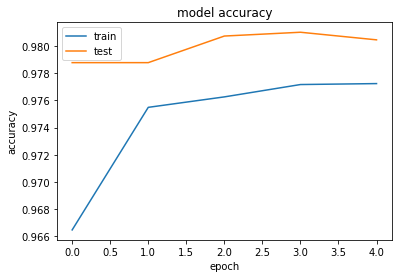

In [58]:
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()